In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.integrate as integrate
import scipy.optimize as optimize

In [49]:
import cProfile

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
sess = tf.InteractiveSession()

In [5]:
saver = tf.train.import_meta_graph('mnist/conv_99_new.meta')

In [6]:
saver.restore(sess,'mnist/conv_99_new')

INFO:tensorflow:Restoring parameters from mnist/conv_99_new


In [7]:
print(tf.global_variables())

[<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(3136, 1024) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable/Adam:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable/Adam_1:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2/Adam:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_2

In [8]:
keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
x = tf.get_default_graph().get_tensor_by_name("x:0")
y_conv = tf.get_default_graph().get_tensor_by_name("y_conv:0")
y_conv_s = tf.get_default_graph().get_tensor_by_name("y_conv_s:0")

# Let's create a 3 pixel shifting image

In [9]:
pic = mnist.train.images[7]

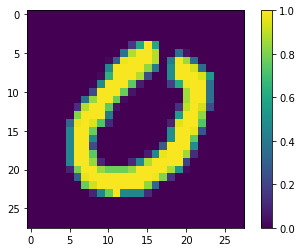

In [10]:
plt.imshow(pic.reshape([28,28]))
plt.colorbar()

In [11]:
def make_pix_pic(coords=[(14,14)]):
    init_pic = np.zeros(784)
    init_pic = init_pic.reshape([28,28])
    for i, co in enumerate(coords):
        init_pic[co] = 0.5
    return init_pic.reshape(784)

In [12]:
init_pic = np.zeros(784)
init_pic = init_pic.reshape([28,28])
init_pic[14, 10] = 0.9

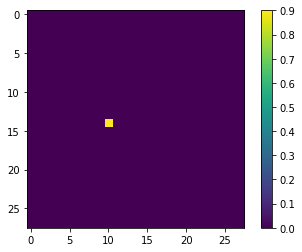

In [13]:
plt.imshow(init_pic)
plt.colorbar()

# Let's compute the geodesics..

In [14]:
def norm(x):
    return np.sqrt(np.sum(x**2))

In [15]:
def callbak(x,convergence):
    print('x is: ', x)
    print('val is: ', convergence)

In [16]:
te=optimize.differential_evolution(norm, bounds=[(0,1), (0,1), (0,1), (0.1,1)], disp=True)

differential_evolution step 1: f(x)= 0.193707
differential_evolution step 2: f(x)= 0.182034
differential_evolution step 3: f(x)= 0.182034
differential_evolution step 4: f(x)= 0.182034
differential_evolution step 5: f(x)= 0.182034
differential_evolution step 6: f(x)= 0.182034
differential_evolution step 7: f(x)= 0.182034
differential_evolution step 8: f(x)= 0.182034
differential_evolution step 9: f(x)= 0.182034
differential_evolution step 10: f(x)= 0.165803
differential_evolution step 11: f(x)= 0.137496
differential_evolution step 12: f(x)= 0.122988
differential_evolution step 13: f(x)= 0.122988
differential_evolution step 14: f(x)= 0.112473
differential_evolution step 15: f(x)= 0.105968
differential_evolution step 16: f(x)= 0.105968
differential_evolution step 17: f(x)= 0.105968
differential_evolution step 18: f(x)= 0.105968
differential_evolution step 19: f(x)= 0.104011
differential_evolution step 20: f(x)= 0.101758
differential_evolution step 21: f(x)= 0.101758
differential_evolution

In [17]:
te

     fun: 0.1
     jac: array([5.13478149e-08, 5.13478149e-08, 5.13478149e-08, 9.99999999e-01])
 message: 'Optimization terminated successfully.'
    nfev: 2410
     nit: 39
 success: True
       x: array([0. , 0. , 0. , 0.1])

In [18]:
def shift_pic(pic, shift=4):
    return np.roll(pic.reshape([28,28]), shift, axis=1).reshape([784,])

In [19]:
def apply_scalar_padding(x, unpadded_coords=[(14,15)]):
    pic = np.zeros([28, 28])
    pic[unpadded_coords] = x
    return pic.reshape(784)

In [20]:
def apply_padding(x, unpadded_coords=[(14, 13), (14,14), (14,15), (14,16)]):
    pic = np.zeros([28, 28])
    #pic = 1/100.*np.random.rand(28, 28)
    for i, coords in enumerate(unpadded_coords):
        pic[coords] = x[i]
    return pic.reshape(784)

In [21]:
def create_vec_tensor(categories, target = y_conv_s):
    vec_tens = []
    for i in range(categories):
            vec_tens.append(tf.gradients(target[:,i], x)[0])
    return vec_tens

In [22]:
vec_tens = create_vec_tensor(10)
def compute_vec_grad(pic, vec_tens):
    var_grad = sess.run(vec_tens, feed_dict={x: pic.reshape([1,len(pic)]), keep_prob: 1.0})
    return np.asarray(var_grad).reshape([10, 784])

In [103]:
del compute_metric

In [104]:
def compute_metric(pic, compute_vec_grad=compute_vec_grad, alpha=1.0, beta=0.0):
    vec_grad = compute_vec_grad(pic, vec_tens)
    #vec_grad = vec_grad/np.sqrt(np.sum(vec_grad**2, axis=1)).reshape([10,1])
    return alpha*np.identity(784) + beta*np.dot(np.transpose(vec_grad),vec_grad)

In [105]:
del interp_integrand

In [106]:
def interp_integrand(start_pic, end_pic, t, metric=compute_metric):
    curr_pic = (1-t)*start_pic + t*end_pic 
    return np.sqrt( np.dot( np.dot(end_pic-start_pic, metric(curr_pic)), end_pic-start_pic))

In [107]:
del mid_func

In [108]:
def mid_func(midpoint, startpoint, endpoint, metric=compute_metric):
    l = integrate.romberg(lambda t: interp_integrand(startpoint, midpoint, t),0,1, tol=1e-1, rtol=1e-4)
    r = integrate.romberg(lambda t: interp_integrand(midpoint, endpoint, t),0,1, tol=1e-1, rtol=1e-4)
    segment_sum = l + r
    gini = (l**2+r**2)/(l+r)**2 - 0.5
#     print("seg1: ", l)
#     print("seg2: ", r)
#     print("gini: ", gini)
    return segment_sum + gini

In [26]:
def distance_geod(geod):
    print("integrating geodesic")
    length = 0
    for i in range(len(geod)-1):
        length+=integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1e-1, rtol=1e-4)

    return length


def distance_geod_array(geod):
    print("integrating geodesic")
    length = []
    for i in range(len(geod)-1):
        length.append(integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1e-1, rtol=1e-4))

    return np.asarray(length)

def top_n_length_ids(geod, n=4):
    return np.argsort(distance_geod_array(geod))[-n:][::-1]

def compute_mid_ids(geod):
    midid = np.floor((len(geod))/2.0)
    lowid = np.ceil(midid/2.0)
    hiid = midid + lowid
    return np.arange(int(lowid), int(hiid))

In [59]:
del minimize_length_step

In [60]:
def minimize_length_step(point_index, geod):
    bounds = [(0,1)]*4
    print('begin diff evolution')
    soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), geod[point_index-1,:], geod[point_index+1,:]), bounds=bounds, maxiter=50,popsize=50, recombination=1, disp=True)
    print('end diff evolution')
    print('result was: ', soln['x'])
    return np.asarray(apply_padding(soln['x']))

In [72]:
#returns the geodesic with first index being the pt index and second being the actual point (or picture in the mnist case)
def divide(startpoint, endpoint, num_div):
    pt_divs = np.linspace(0, 1, num=num_div)

    geod = np.ones(len(pt_divs)).reshape([len(pt_divs),1])*startpoint.reshape([1,len(startpoint)]) + pt_divs.reshape([len(pt_divs),1])*(endpoint-startpoint).reshape([1,len(startpoint)])
    for pt_index in range(len(pt_divs))[1:-1]:
        if pt_index < len(pt_divs)/2.:
            geod[pt_index] = make_pix_pic(coords=[(14,14)])
        else:
            geod[pt_index] = make_pix_pic(coords=[(14,15)])
    return pt_divs, geod

def refine(geod, num_passes=1, shuffle=True):
    for n in range(num_passes):
        r=np.arange(len(geod))[1:-1]
        if shuffle:
            np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
    return geod 

def compute_geodesic(startpoint, endpoint, num_div, num_passes=2, geod_start=None):
    length_pass = []    
    if geod_start is None:
        grid, geod = divide(startpoint, endpoint, num_div)
        length_pass.append(distance_geod(geod))
    else:
        geod = geod_start[0]
        length_pass.append(geod_start[1])
    for n in range(num_passes):
        r=np.arange(len(geod))[1:-1]
        np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass

def compute_geodesic_top_n(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        r=top_n_length_ids(geod)
        print('top indices: ', r)
        np.random.shuffle(r)
        for pt_index in r:
            print("using point: ", pt_index)
            #handle endpoints:
            if pt_index == 0:
                pt_index_to_use = 1
            else:
                pt_index_to_use = pt_index
            geod[pt_index_to_use] = minimize_length_step(pt_index_to_use, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass

def compute_one_pass_geod(startpoint, endpoint, num_internal_pts=1, num_passes=1):
    grid, geod = divide(startpoint, endpoint, num_internal_pts+2)

    for n in range(num_passes):
        r=np.arange(len(grid))[1:-1]
        np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
    return geod

def compute_geodesic_spreading(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    r  = compute_mid_ids(geod)
    print(r)
    print(np.arange(len(grid))[1:-1])
    rc = np.setdiff1d(np.arange(len(grid))[1:-1], r)
    print(rc)
    for n in range(num_passes):
        print('top indices: ', r)
        np.random.shuffle(r)
        for pt_index in r:
            print("using point: ", pt_index)
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        np.random.shuffle(rc)
        for pt_index in rc:
            print("using point: ", pt_index)
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass


def compute_full_geodesic(startpoint, endpoint, num_internal_pts=1, num_layers=1, num_passes=1):
    if (num_internal_pts != 1) or (num_passes!=1):
        return "Error, num internal pts and num passes must be 1 currently"
    geod = compute_one_pass_geod(startpoint, endpoint, num_internal_pts, num_passes)
    length_layer = []
    length_layer.append(distance_geod(geod))
    for n in range(num_layers):
        #pick index at random
        print("Working on layer: ", n+1)
        #left_index = longest_segment_left_id(geod)
        #left_index = np.random.choice(len(geod)-1)
        new_geod_pt = []
        curr_range = np.arange(len(geod)-1)
        for left_index in curr_range:
            print("using left index: ", left_index)
            new_geod = compute_one_pass_geod(geod[left_index,:], geod[left_index+1,:], num_internal_pts, num_passes)
            new_geod_pt.append(new_geod[1,:])
        geod = np.insert(geod, curr_range+1, new_geod_pt, axis=0)
        #geod = refine(geod, num_passes=2)
        length_layer.append(distance_geod(geod))
    return geod, length_layer


In [29]:
start_pic = shift_pic(make_pix_pic(),shift=-1)
end_pic =  shift_pic(make_pix_pic(),shift=2)

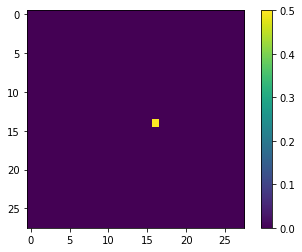

In [30]:
plt.imshow(end_pic.reshape([28,28]))
plt.colorbar()

In [31]:
# bounds = [(0,1)]*3

# soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), start_pic, end_pic), bounds=[(0,1),(0,1),(0,1)], maxiter=100,popsize=30, recombination=1, disp=True)

In [32]:
# soln

In [33]:
g = compute_geodesic(start_pic, end_pic, num_div=9, num_passes=2)

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.0982934
differential_evolution step 2: f(x)= 0.0638884
differential_evolution step 3: f(x)= 0.0638884
differential_evolution step 4: f(x)= 0.0638884
differential_evolution step 5: f(x)= 0.0638884
differential_evolution step 6: f(x)= 0.0638884
differential_evolution step 7: f(x)= 0.0638884
differential_evolution step 8: f(x)= 0.0638884
differential_evolution step 9: f(x)= 0.0638235
differential_evolution step 10: f(x)= 0.0630611
differential_evolution step 11: f(x)= 0.0621595
differential_evolution step 12: f(x)= 0.0621595
differential_evolution step 13: f(x)= 0.0621595
differential_evolution step 14: f(x)= 0.0621595
differential_evolution step 15: f(x)= 0.0601193
differential_evolution step 16: f(x)= 0.0594537
differential_evolution step 17: f(x)= 0.0584399
differential_evolution step 18: f(x)= 0.0584399
differential_evolution step 19: f(x)= 0.0580297
differential_evolution step 20: f(x)= 0.0580297
differe

differential_evolution step 28: f(x)= 0.0339505
differential_evolution step 29: f(x)= 0.0339505
differential_evolution step 30: f(x)= 0.0339505
differential_evolution step 31: f(x)= 0.033942
differential_evolution step 32: f(x)= 0.0339366
differential_evolution step 33: f(x)= 0.0339366
end diff evolution
result was:  [0.10670496 0.05668527 0.40059186 0.06909791]
begin diff evolution
differential_evolution step 1: f(x)= 0.0836904
differential_evolution step 2: f(x)= 0.0804882
differential_evolution step 3: f(x)= 0.0804882
differential_evolution step 4: f(x)= 0.0804882
differential_evolution step 5: f(x)= 0.0793464
differential_evolution step 6: f(x)= 0.0793464
differential_evolution step 7: f(x)= 0.0793464
differential_evolution step 8: f(x)= 0.0788438
differential_evolution step 9: f(x)= 0.0722237
differential_evolution step 10: f(x)= 0.0654489
differential_evolution step 11: f(x)= 0.0654489
differential_evolution step 12: f(x)= 0.0654489
differential_evolution step 13: f(x)= 0.0654489

differential_evolution step 36: f(x)= 0.0222754
differential_evolution step 37: f(x)= 0.0222754
differential_evolution step 38: f(x)= 0.0222642
differential_evolution step 39: f(x)= 0.0222435
differential_evolution step 40: f(x)= 0.0222435
differential_evolution step 41: f(x)= 0.0222435
differential_evolution step 42: f(x)= 0.0222346
end diff evolution
result was:  [0.13240174 0.40020281 0.13527329 0.02617936]
begin diff evolution
differential_evolution step 1: f(x)= 0.0467676
differential_evolution step 2: f(x)= 0.0154898
differential_evolution step 3: f(x)= 0.0154898
differential_evolution step 4: f(x)= 0.0154898
differential_evolution step 5: f(x)= 0.0154898
differential_evolution step 6: f(x)= 0.0154898
differential_evolution step 7: f(x)= 0.0154898
differential_evolution step 8: f(x)= 0.0154898
differential_evolution step 9: f(x)= 0.0154898
differential_evolution step 10: f(x)= 0.0154898
differential_evolution step 11: f(x)= 0.0150694
differential_evolution step 12: f(x)= 0.015069

differential_evolution step 15: f(x)= 0.0463341
differential_evolution step 16: f(x)= 0.0463341
differential_evolution step 17: f(x)= 0.0463341
differential_evolution step 18: f(x)= 0.0450435
differential_evolution step 19: f(x)= 0.044496
differential_evolution step 20: f(x)= 0.0432594
differential_evolution step 21: f(x)= 0.0423276
differential_evolution step 22: f(x)= 0.0423276
differential_evolution step 23: f(x)= 0.0423276
differential_evolution step 24: f(x)= 0.0423276
differential_evolution step 25: f(x)= 0.0410911
differential_evolution step 26: f(x)= 0.0410911
differential_evolution step 27: f(x)= 0.0407585
differential_evolution step 28: f(x)= 0.0407585
differential_evolution step 29: f(x)= 0.0407585
differential_evolution step 30: f(x)= 0.0406781
differential_evolution step 31: f(x)= 0.0406355
differential_evolution step 32: f(x)= 0.0406355
differential_evolution step 33: f(x)= 0.0405934
differential_evolution step 34: f(x)= 0.0405927
differential_evolution step 35: f(x)= 0.0

In [37]:
g_four = compute_geodesic(start_pic, end_pic, num_div=9, num_passes=4)

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.0955341
differential_evolution step 2: f(x)= 0.085342
differential_evolution step 3: f(x)= 0.0732929
differential_evolution step 4: f(x)= 0.0732929
differential_evolution step 5: f(x)= 0.0660972
differential_evolution step 6: f(x)= 0.0660972
differential_evolution step 7: f(x)= 0.0660972
differential_evolution step 8: f(x)= 0.0599067
differential_evolution step 9: f(x)= 0.0574569
differential_evolution step 10: f(x)= 0.0574569
differential_evolution step 11: f(x)= 0.0574569
differential_evolution step 12: f(x)= 0.0574569
differential_evolution step 13: f(x)= 0.0574569
differential_evolution step 14: f(x)= 0.0574569
differential_evolution step 15: f(x)= 0.0574569
differential_evolution step 16: f(x)= 0.0574569
differential_evolution step 17: f(x)= 0.0574569
differential_evolution step 18: f(x)= 0.0571227
differential_evolution step 19: f(x)= 0.0571227
differential_evolution step 20: f(x)= 0.0571227
differen

differential_evolution step 4: f(x)= 0.0401499
differential_evolution step 5: f(x)= 0.0401499
differential_evolution step 6: f(x)= 0.0363731
differential_evolution step 7: f(x)= 0.0363731
differential_evolution step 8: f(x)= 0.0363731
differential_evolution step 9: f(x)= 0.0353536
differential_evolution step 10: f(x)= 0.0303045
differential_evolution step 11: f(x)= 0.0303045
differential_evolution step 12: f(x)= 0.0303045
differential_evolution step 13: f(x)= 0.0303045
differential_evolution step 14: f(x)= 0.0303045
differential_evolution step 15: f(x)= 0.0303045
differential_evolution step 16: f(x)= 0.0297214
differential_evolution step 17: f(x)= 0.0297214
differential_evolution step 18: f(x)= 0.0273221
differential_evolution step 19: f(x)= 0.0258044
differential_evolution step 20: f(x)= 0.0257811
differential_evolution step 21: f(x)= 0.0257811
differential_evolution step 22: f(x)= 0.0257811
differential_evolution step 23: f(x)= 0.0257811
differential_evolution step 24: f(x)= 0.025781

differential_evolution step 3: f(x)= 0.0412889
differential_evolution step 4: f(x)= 0.0250064
differential_evolution step 5: f(x)= 0.0250064
differential_evolution step 6: f(x)= 0.0250064
differential_evolution step 7: f(x)= 0.0250064
differential_evolution step 8: f(x)= 0.024513
differential_evolution step 9: f(x)= 0.024513
differential_evolution step 10: f(x)= 0.0230552
differential_evolution step 11: f(x)= 0.0230552
differential_evolution step 12: f(x)= 0.0230552
differential_evolution step 13: f(x)= 0.0230552
differential_evolution step 14: f(x)= 0.0230552
differential_evolution step 15: f(x)= 0.0230552
differential_evolution step 16: f(x)= 0.0230552
differential_evolution step 17: f(x)= 0.0227605
differential_evolution step 18: f(x)= 0.0227605
differential_evolution step 19: f(x)= 0.0227246
differential_evolution step 20: f(x)= 0.0227246
differential_evolution step 21: f(x)= 0.0226149
differential_evolution step 22: f(x)= 0.0221165
differential_evolution step 23: f(x)= 0.0221165
d

end diff evolution
result was:  [0.03103326 0.07786967 0.34348405 0.13282616]
begin diff evolution
differential_evolution step 1: f(x)= 0.0391246
differential_evolution step 2: f(x)= 0.0391246
differential_evolution step 3: f(x)= 0.0391246
differential_evolution step 4: f(x)= 0.0380939
differential_evolution step 5: f(x)= 0.0380939
differential_evolution step 6: f(x)= 0.0370059
differential_evolution step 7: f(x)= 0.0332344
differential_evolution step 8: f(x)= 0.0332344
differential_evolution step 9: f(x)= 0.0328448
differential_evolution step 10: f(x)= 0.0328448
differential_evolution step 11: f(x)= 0.0304743
differential_evolution step 12: f(x)= 0.0304743
differential_evolution step 13: f(x)= 0.0304743
differential_evolution step 14: f(x)= 0.0298011
differential_evolution step 15: f(x)= 0.0298011
differential_evolution step 16: f(x)= 0.0298011
differential_evolution step 17: f(x)= 0.0298011
differential_evolution step 18: f(x)= 0.0298011
differential_evolution step 19: f(x)= 0.029322

differential_evolution step 28: f(x)= 0.0149758
differential_evolution step 29: f(x)= 0.0149758
differential_evolution step 30: f(x)= 0.0145338
differential_evolution step 31: f(x)= 0.0145338
differential_evolution step 32: f(x)= 0.0145338
differential_evolution step 33: f(x)= 0.0144958
differential_evolution step 34: f(x)= 0.0144867
differential_evolution step 35: f(x)= 0.0143231
differential_evolution step 36: f(x)= 0.0142834
differential_evolution step 37: f(x)= 0.0141759
differential_evolution step 38: f(x)= 0.0141759
differential_evolution step 39: f(x)= 0.0141759
differential_evolution step 40: f(x)= 0.0141759
differential_evolution step 41: f(x)= 0.0141642
differential_evolution step 42: f(x)= 0.0141151
differential_evolution step 43: f(x)= 0.0141151
differential_evolution step 44: f(x)= 0.0141151
differential_evolution step 45: f(x)= 0.0141151
differential_evolution step 46: f(x)= 0.0141143
end diff evolution
result was:  [0.13913675 0.35338672 0.17010058 0.04164577]
begin diff

differential_evolution step 6: f(x)= 0.0301171
differential_evolution step 7: f(x)= 0.0299077
differential_evolution step 8: f(x)= 0.0292118
differential_evolution step 9: f(x)= 0.0286802
differential_evolution step 10: f(x)= 0.0286802
differential_evolution step 11: f(x)= 0.0286802
differential_evolution step 12: f(x)= 0.0286802
differential_evolution step 13: f(x)= 0.0278721
differential_evolution step 14: f(x)= 0.0275511
differential_evolution step 15: f(x)= 0.0275511
differential_evolution step 16: f(x)= 0.0272273
differential_evolution step 17: f(x)= 0.0270058
differential_evolution step 18: f(x)= 0.0270058
differential_evolution step 19: f(x)= 0.027005
differential_evolution step 20: f(x)= 0.027005
differential_evolution step 21: f(x)= 0.0269981
end diff evolution
result was:  [0.4358368  0.08809771 0.1068783  0.00375392]
begin diff evolution
differential_evolution step 1: f(x)= 0.0408759
differential_evolution step 2: f(x)= 0.0398438
differential_evolution step 3: f(x)= 0.036109

differential_evolution step 22: f(x)= 0.0188745
differential_evolution step 23: f(x)= 0.0186208
differential_evolution step 24: f(x)= 0.0184087
differential_evolution step 25: f(x)= 0.0182465
differential_evolution step 26: f(x)= 0.0182011
differential_evolution step 27: f(x)= 0.0182011
differential_evolution step 28: f(x)= 0.0180125
differential_evolution step 29: f(x)= 0.0180027
differential_evolution step 30: f(x)= 0.0180027
differential_evolution step 31: f(x)= 0.0179898
differential_evolution step 32: f(x)= 0.0179898
differential_evolution step 33: f(x)= 0.0179836
differential_evolution step 34: f(x)= 0.0179836
differential_evolution step 35: f(x)= 0.0179759
differential_evolution step 36: f(x)= 0.0179759
differential_evolution step 37: f(x)= 0.0179759
differential_evolution step 38: f(x)= 0.0179694
differential_evolution step 39: f(x)= 0.0179694
differential_evolution step 40: f(x)= 0.0179688
differential_evolution step 41: f(x)= 0.0179655
differential_evolution step 42: f(x)= 0.

In [58]:
cProfile.run('compute_geodesic(start_pic, end_pic, num_div=3, num_passes=1)')

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.101279
differential_evolution step 2: f(x)= 0.101279
end diff evolution
result was:  [0.32027722 0.04177181 0.1551987  0.29948881]
integrating geodesic
         7867191 function calls (7765903 primitive calls) in 77.971 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     6836    0.017    0.000    0.027    0.000 <frozen importlib._bootstrap>:997(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <ipython-input-11-68afdb0fc71e>:1(make_pix_pic)
      961    0.005    0.000    0.011    0.000 <ipython-input-20-742a0c76bc24>:1(apply_padding)
     6836    0.076    0.000   45.819    0.007 <ipython-input-22-87ff647bb1a2>:2(compute_vec_grad)
     6836   10.633    0.002   75.504    0.011 <ipython-input-23-452a847b6082>:1(compute_metric)
     6836    0.454    0.000   77.605    0.011 <ipython-input-24-a19eec878bcc>:1(interp_integrand)
      960

    20508    0.008    0.000    0.008    0.000 {built-in method builtins.iter}
   173536    0.031    0.000    0.031    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.locals}
        8    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.min}
27346/8094    0.017    0.000   31.812    0.004 {built-in method builtins.next}
        7    0.000    0.000    0.001    0.000 {built-in method builtins.print}
     2374    0.006    0.000    0.006    0.000 {built-in method numpy.core.multiarray.arange}
    23317    0.207    0.000    0.207    0.000 {built-in method numpy.core.multiarray.array}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.c_einsum}
        3    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.copyto}
    20508   14.165    0.001   14.165    0.001 {built-in method numpy.core.multia

In [ ]:
g_flat_metric = compute_geodesic(start_pic, end_pic, num_div=9, num_passes=2)

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.29333
differential_evolution step 2: f(x)= 0.29333
differential_evolution step 3: f(x)= 0.153258
differential_evolution step 4: f(x)= 0.142112
differential_evolution step 5: f(x)= 0.0903449
differential_evolution step 6: f(x)= 0.0903449
differential_evolution step 7: f(x)= 0.0903449
differential_evolution step 8: f(x)= 0.0659273
differential_evolution step 9: f(x)= 0.0659273
differential_evolution step 10: f(x)= 0.0617387
differential_evolution step 11: f(x)= 0.045643
differential_evolution step 12: f(x)= 0.045643
differential_evolution step 13: f(x)= 0.045643
differential_evolution step 14: f(x)= 0.045643
differential_evolution step 15: f(x)= 0.0273164
differential_evolution step 16: f(x)= 0.0273164
differential_evolution step 17: f(x)= 0.0273164
differential_evolution step 18: f(x)= 0.0273164
differential_evolution step 19: f(x)= 0.00666601
differential_evolution step 20: f(x)= 0.00666601
differential_ev

In [73]:
g_flat_metric_two = compute_geodesic(start_pic, end_pic, num_div=9, num_passes=2, geod_start=g_flat_metric)

begin diff evolution
differential_evolution step 1: f(x)= 0.0850171
differential_evolution step 2: f(x)= 0.0763822
differential_evolution step 3: f(x)= 0.0660601


KeyboardInterrupt: 

In [31]:
g_adap = compute_full_geodesic(start_pic, end_pic, num_layers=2)

begin diff evolution
differential_evolution step 1: f(x)= 0.131245
differential_evolution step 2: f(x)= 0.0983999
differential_evolution step 3: f(x)= 0.0919952
differential_evolution step 4: f(x)= 0.0919952
differential_evolution step 5: f(x)= 0.0879842
differential_evolution step 6: f(x)= 0.0879842
differential_evolution step 7: f(x)= 0.0879842
differential_evolution step 8: f(x)= 0.0879842
differential_evolution step 9: f(x)= 0.085678
differential_evolution step 10: f(x)= 0.085678
differential_evolution step 11: f(x)= 0.085678
differential_evolution step 12: f(x)= 0.085678
differential_evolution step 13: f(x)= 0.085678
differential_evolution step 14: f(x)= 0.0856703
differential_evolution step 15: f(x)= 0.0853981
differential_evolution step 16: f(x)= 0.0849902
differential_evolution step 17: f(x)= 0.0849902
differential_evolution step 18: f(x)= 0.0842613
differential_evolution step 19: f(x)= 0.0842613
differential_evolution step 20: f(x)= 0.0842613
differential_evolution step 21: f(

differential_evolution step 31: f(x)= 0.018013
differential_evolution step 32: f(x)= 0.0179795
differential_evolution step 33: f(x)= 0.0179795
end diff evolution
result was:  [0.1672185  0.15737392 0.04953462 0.29729234]
using left index:  3
begin diff evolution
differential_evolution step 1: f(x)= 0.0619305
differential_evolution step 2: f(x)= 0.0619305
differential_evolution step 3: f(x)= 0.0410473
differential_evolution step 4: f(x)= 0.0410473
differential_evolution step 5: f(x)= 0.0213064
differential_evolution step 6: f(x)= 0.0184041
differential_evolution step 7: f(x)= 0.0184041
differential_evolution step 8: f(x)= 0.0184041
differential_evolution step 9: f(x)= 0.0184041
differential_evolution step 10: f(x)= 0.0184041
differential_evolution step 11: f(x)= 0.0184041
differential_evolution step 12: f(x)= 0.0184041
differential_evolution step 13: f(x)= 0.0176177
differential_evolution step 14: f(x)= 0.0171974
differential_evolution step 15: f(x)= 0.0166545
differential_evolution ste

vals:  [0.5 0.  0.  0. ]


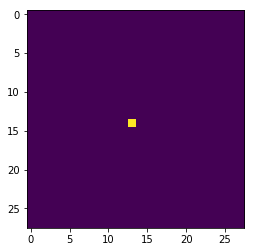

vals:  [0.3946935  0.16633202 0.05062666 0.00043359]


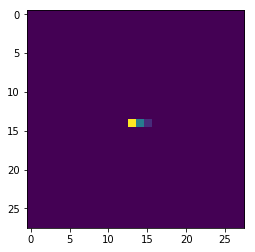

vals:  [0.19371523 0.36299434 0.15397853 0.00928987]


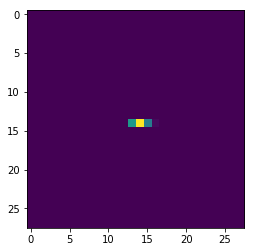

vals:  [0.13240174 0.40020281 0.13527329 0.02617936]


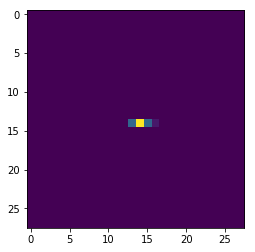

vals:  [0.14398521 0.24800673 0.27300201 0.00252468]


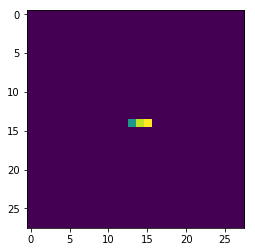

vals:  [0.2015187  0.11386874 0.31613423 0.10097022]


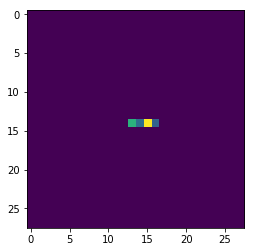

vals:  [0.2264012  0.04677383 0.26049895 0.18705875]


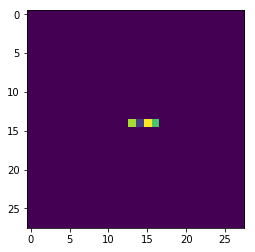

vals:  [0.22196707 0.00844941 0.02204184 0.41646369]


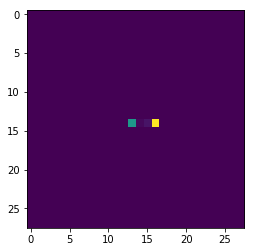

vals:  [0.  0.  0.  0.5]


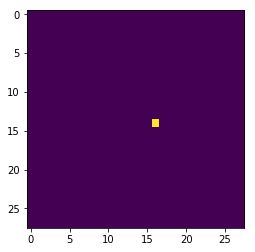

IndexError: index 9 is out of bounds for axis 0 with size 9

In [34]:
for i in range(12):
    print('vals: ', (g[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g[0][i,:].reshape([28,28]))
    plt.show()

vals:  [0.5 0.  0.  0. ]


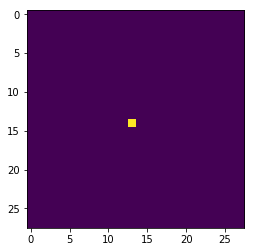

vals:  [0.4358368  0.08809771 0.1068783  0.00375392]


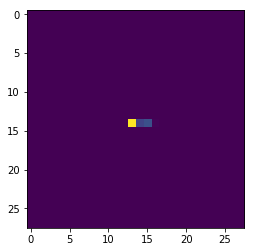

vals:  [0.35308427 0.21777762 0.15782117 0.00600215]


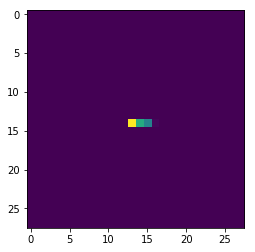

vals:  [0.29361557 0.24069065 0.16870085 0.00814129]


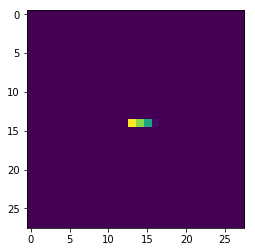

vals:  [0.19356279 0.26682203 0.2144168  0.0202922 ]


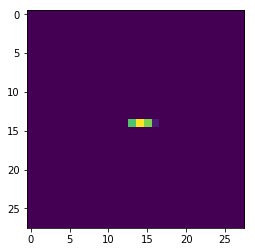

vals:  [0.1357742  0.17998859 0.29820405 0.01800551]


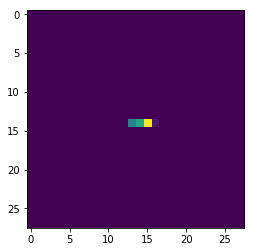

vals:  [0.02296907 0.06477682 0.31074467 0.16902305]


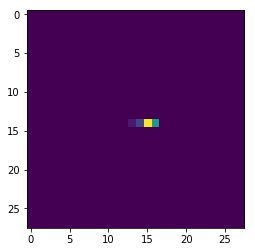

vals:  [0.00243947 0.02236793 0.13898492 0.41899902]


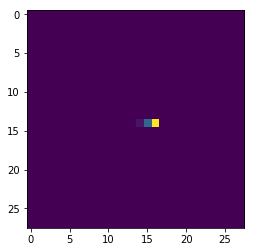

vals:  [0.  0.  0.  0.5]


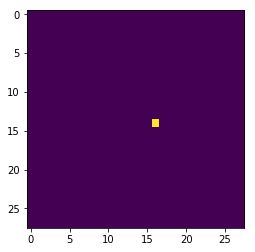

IndexError: index 9 is out of bounds for axis 0 with size 9

In [38]:
for i in range(12):
    print('vals: ', (g_four[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g_four[0][i,:].reshape([28,28]))
    plt.show()

vals:  [0.5 0.  0.  0. ]


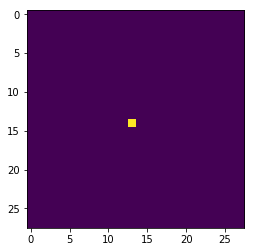

vals:  [3.82521507e-01 1.74410803e-01 7.32403205e-02 1.60123911e-04]


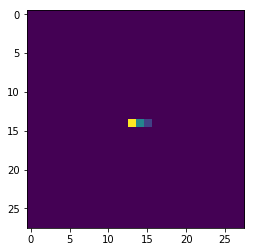

vals:  [0.16298603 0.35525414 0.14069552 0.01191729]


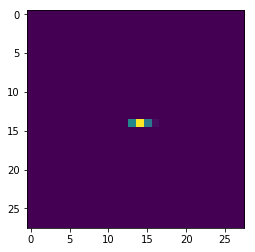

vals:  [1.34855232e-01 2.29556479e-01 2.98301622e-01 2.48027896e-05]


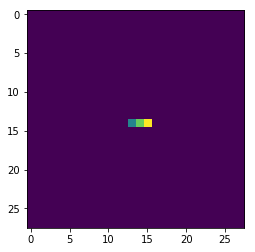

vals:  [0.0078347  0.14825746 0.37856548 0.00418198]


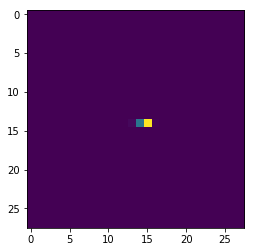

vals:  [0.04608378 0.09473988 0.39083348 0.04973106]


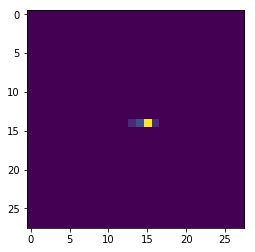

vals:  [0.04722379 0.08533771 0.32642792 0.07223918]


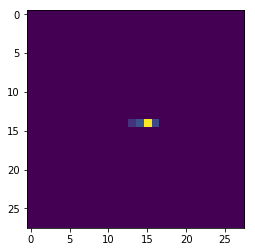

vals:  [0.04452497 0.00499001 0.20346136 0.29562427]


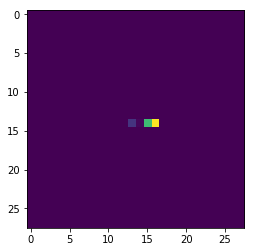

vals:  [0.  0.  0.  0.5]


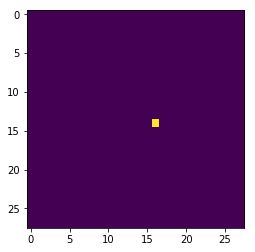

IndexError: index 9 is out of bounds for axis 0 with size 9

In [64]:
for i in range(12):
    print('vals: ', (g_flat_metric[0][i,:].reshape([28,28])[14,13:17]))
    plt.imshow(g_flat_metric[0][i,:].reshape([28,28]))
    plt.show()

In [36]:
g[1]

[0.22326407137784843,
 0.2579803765768173,
 0.25899198741457147,
 0.26608939572319007,
 0.23944280347182614,
 0.249789552703414,
 0.2486740800012172]

In [46]:
g[1]

[0.830865757346499, 0.7758275062399899]

In [47]:
g_two[1]

[0.830865757346499, 0.7443084341907422, 0.748285282986187]

In [64]:
g_adap[1]

[0.17124874591481304, 0.21325169732882512, 0.2914623525224574]

In [35]:
g[1]

[0.1988582764066274, 0.1367645262633253, 0.12464945440189792]

In [39]:
g_four[1]

[0.1988582764066274,
 0.13319850774136102,
 0.10799347441723887,
 0.09644975790647,
 0.08999747232146385]

In [40]:
distance_geod_array(g_four[0])

integrating geodesic


array([0.01343382, 0.01293076, 0.00862103, 0.00869505, 0.00887731,
       0.0090446 , 0.01449938, 0.01389553])

In [65]:
g_flat_metric[1]

[0.1988582764066274, 0.14846874318896242, 0.11176446383950525]

In [108]:
xp=[0.86567701, 0.35655615, 0.04728986, 0.01647769]
mid_pic = apply_padding(x)
s_coord = [14,16]
m_coord = [14,14]
f_coord = [14,18]
divfac=1.
one = integrate.romberg(lambda t: interp_integrand(g_adap[0][0,:], mid_pic, t), 0, 1, tol=1e-2, rtol=1e-5)+integrate.romberg(lambda t: interp_integrand(mid_pic, g_adap[0][1,:], t), 0, 1, tol=1e-2, rtol=1e-5)
two = integrate.romberg(lambda t: interp_integrand(g_adap[0][0,:], g_adap[0][1,:], t), 0, 1, tol=1e-2, rtol=1e-5)
print("segmented: ", one)
print("not segmented: ", two)

TypeError: unhashable type: 'list'

In [67]:
integrate.romberg(lambda t: interp_integrand(g_flat_metric[0][0,:], g_flat_metric[0][8,:], t), 0, 1, tol=1e-2, rtol=1e-5)

0.09508840458752923

In [91]:
integrate.romberg(lambda t: interp_integrand(g_adap[0][0,:], g_adap[0][8,:], t, metric=compute_metric), 0, 1, tol=1e-2, rtol=1e-5)

Using new metric
Using new metric
Using new metric


0.7071067811865476

numpy.ndarray

In [107]:
(g_adap[0][0,:]+mid_pic).shape

(784,)